In [67]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import AgglomerativeClustering
from scipy.spatial import distance_matrix

In [68]:
data = pd.read_csv('cars_clus.csv')
data.head()

,manufact,model,sales,resale,type,price,engine_s,horsepow,wheelbas,width,length,curb_wgt,fuel_cap,mpg,lnsales,partition
0,Acura,Integra,16.919,16.360,0.000,21.500,1.800,140.000,101.200,67.300,172.400,2.639,13.200,28.000,2.828,0.0
1,Acura,TL,39.384,19.875,0.000,28.400,3.200,225.000,108.100,70.300,192.900,3.517,17.200,25.000,3.673,0.0
2,Acura,CL,14.114,18.225,0.000,$null$,3.200,225.000,106.900,70.600,192.000,3.470,17.200,26.000,2.647,0.0
3,Acura,RL,8.588,29.725,0.000,42.000,3.500,210.000,114.600,71.400,196.600,3.850,18.000,22.000,2.150,0.0
4,Audi,A4,20.397,22.255,0.000,23.990,1.800,150.000,102.600,68.200,178.000,2.998,16.400,27.000,3.015,0.0


In [69]:
data.columns

Index(['manufact', 'model', 'sales', 'resale', 'type', 'price', 'engine_s',
       'horsepow', 'wheelbas', 'width', 'length', 'curb_wgt', 'fuel_cap',
       'mpg', 'lnsales', 'partition'],
      dtype='object')

In [70]:
data[['price', 'engine_s',
       'horsepow', 'wheelbas', 'width', 'length', 'curb_wgt', 'fuel_cap',
       'mpg', 'lnsales']] = data[['price', 'engine_s',
       'horsepow', 'wheelbas', 'width', 'length', 'curb_wgt', 'fuel_cap',
       'mpg', 'lnsales']].apply(pd.to_numeric, errors = 'coerce')
data = data.dropna()
data = data.reset_index(drop = True)
data.head()

,manufact,model,sales,resale,type,price,engine_s,horsepow,wheelbas,width,length,curb_wgt,fuel_cap,mpg,lnsales,partition
0,Acura,Integra,16.919,16.360,0.000,21.50,1.8,140.0,101.2,67.3,172.4,2.639,13.2,28.0,2.828,0.0
1,Acura,TL,39.384,19.875,0.000,28.40,3.2,225.0,108.1,70.3,192.9,3.517,17.2,25.0,3.673,0.0
2,Acura,RL,8.588,29.725,0.000,42.00,3.5,210.0,114.6,71.4,196.6,3.850,18.0,22.0,2.150,0.0
3,Audi,A4,20.397,22.255,0.000,23.99,1.8,150.0,102.6,68.2,178.0,2.998,16.4,27.0,3.015,0.0
4,Audi,A6,18.780,23.555,0.000,33.95,2.8,200.0,108.7,76.1,192.0,3.561,18.5,22.0,2.933,0.0


In [71]:
data['kml'] = 236.25/data['mpg']

In [72]:
featureset = data[['price', 'engine_s',
       'horsepow', 'wheelbas', 'width', 'length', 'curb_wgt', 'fuel_cap',
       'mpg', 'kml']]

## data scaling

In [73]:
from sklearn.preprocessing import MinMaxScaler

scale = MinMaxScaler()
x = featureset.values
featuremtx = scale.fit_transform(x)
featuremtx[:5]

array([[0.16082082, 0.11428571, 0.21518987, 0.18655098, 0.2716763 ,
        0.30625832, 0.20233886, 0.13364055, 0.43333333, 0.30357143],
       [0.25129483, 0.31428571, 0.43037975, 0.3362256 , 0.44508671,
        0.5792277 , 0.44112048, 0.31797235, 0.33333333, 0.4       ],
       [0.4296204 , 0.35714286, 0.39240506, 0.47722343, 0.50867052,
        0.62849534, 0.53168344, 0.35483871, 0.23333333, 0.52272727],
       [0.19347014, 0.11428571, 0.24050633, 0.21691974, 0.32369942,
        0.38082557, 0.2999728 , 0.28110599, 0.4       , 0.33333333],
       [0.3240674 , 0.25714286, 0.36708861, 0.34924078, 0.78034682,
        0.56724368, 0.45308676, 0.37788018, 0.23333333, 0.52272727]])

In [74]:
dist_matrix = distance_matrix(featuremtx, featuremtx)
dist_matrix

array([[0.        , 0.5759961 , 0.80781014, ..., 0.41200407, 0.66808743,
        0.6982306 ],
       [0.5759961 , 0.        , 0.30992285, ..., 0.23663252, 0.31793265,
        0.25463813],
       [0.80781014, 0.30992285, 0.        , ..., 0.44165494, 0.33076248,
        0.2665043 ],
       ...,
       [0.41200407, 0.23663252, 0.44165494, ..., 0.        , 0.33762449,
        0.30678186],
       [0.66808743, 0.31793265, 0.33076248, ..., 0.33762449, 0.        ,
        0.25256713],
       [0.6982306 , 0.25463813, 0.2665043 , ..., 0.30678186, 0.25256713,
        0.        ]])

In [75]:
model = AgglomerativeClustering()
model.fit(featuremtx)

AgglomerativeClustering()

In [93]:
print('labales: ',len(model.labels_))
print('mtx[0]: ', len(featuremtx[0]))
print('mtx[1]: ', len(featuremtx[1]))
print('feature mtx len: ', len(featuremtx))
print('data[5]: ', len(data.values[5]))

labales:  152
mtx[0]:  10
mtx[1]:  10
feature mtx len:  152
data[5]:  18


In [80]:
data['labels'] = model.labels_
data

,manufact,model,sales,resale,type,price,engine_s,horsepow,wheelbas,width,length,curb_wgt,fuel_cap,mpg,lnsales,partition,kml,labels
0,Acura,Integra,16.919,16.360,0.000,21.50,1.8,140.0,101.2,67.3,172.4,2.639,13.2,28.0,2.828,0.0,8.437500,1
1,Acura,TL,39.384,19.875,0.000,28.40,3.2,225.0,108.1,70.3,192.9,3.517,17.2,25.0,3.673,0.0,9.450000,0
2,Acura,RL,8.588,29.725,0.000,42.00,3.5,210.0,114.6,71.4,196.6,3.850,18.0,22.0,2.150,0.0,10.738636,0
3,Audi,A4,20.397,22.255,0.000,23.99,1.8,150.0,102.6,68.2,178.0,2.998,16.4,27.0,3.015,0.0,8.750000,1
4,Audi,A6,18.780,23.555,0.000,33.95,2.8,200.0,108.7,76.1,192.0,3.561,18.5,22.0,2.933,0.0,10.738636,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
147,Volvo,V40,3.545,$null$,0.000,24.40,1.9,160.0,100.5,67.6,176.6,3.042,15.8,25.0,1.266,0.0,9.450000,1
148,Volvo,S70,15.245,$null$,0.000,27.50,2.4,168.0,104.9,69.3,185.9,3.208,17.9,25.0,2.724,0.0,9.450000,1
149,Volvo,V70,17.531,$null$,0.000,28.80,2.4,168.0,104.9,69.3,186.2,3.259,17.9,25.0,2.864,0.0,9.450000,1
150,Volvo,C70,3.493,$null$,0.000,45.50,2.3,236.0,104.9,71.5,185.7,3.601,18.5,23.0,1.251,0.0,10.271739,0


In [108]:
from scipy.cluster import hierarchy
Z = hierarchy.linkage(dist_matrix, 'complete')

/var/folders/f0/jlv7kmc54933ltbm2dzsh3k80000gn/T/ipykernel_3549/3409742170.py:2: ClusterWarning: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  Z = hierarchy.linkage(dist_matrix, 'complete')


In [115]:
from scipy.cluster.hierarchy import fcluster
max_d = 3
clusters = fcluster(Z, max_d, criterion='distance')
clusters

array([ 3,  7,  5,  1,  5,  8,  1,  1,  7,  7,  5,  4,  5,  4,  4,  5, 13,
        3,  1,  7,  7,  7, 10,  2, 16,  7,  1,  1,  7,  1,  4,  5,  3,  1,
        1, 15, 13, 12, 12,  9,  8,  7,  3,  7,  1,  7,  3,  9,  5,  9, 12,
        7, 13,  2,  1,  1,  5,  4,  2,  3,  1,  7,  5, 11,  6,  5,  7,  5,
        4,  4, 12,  5,  4,  8, 13,  3,  1,  1,  5,  6,  4,  6,  1,  1,  7,
        9,  5,  5,  1,  5,  8, 14,  3,  3,  1, 14,  5,  3,  1,  7,  5,  5,
        5,  5,  1,  1,  4,  5,  4,  3,  1,  7, 10,  1,  1,  7,  7,  5,  4,
        6, 10, 10,  7,  1,  2,  2,  3,  1,  1,  1,  1,  2,  1,  7,  3,  3,
        5,  3,  1, 12,  3,  3,  1,  3,  3,  3,  1,  1,  1,  1,  5,  5],
      dtype=int32)

In [117]:
from scipy.cluster.hierarchy import fcluster

k = 5
clusters = fcluster(Z, k, criterion='maxclust')
clusters

array([1, 2, 2, 1, 2, 3, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 4, 1, 1, 2, 2, 2,
       3, 1, 5, 2, 1, 1, 2, 1, 2, 2, 1, 1, 1, 4, 4, 4, 4, 3, 3, 2, 1, 2,
       1, 2, 1, 3, 2, 3, 4, 2, 4, 1, 1, 1, 2, 2, 1, 1, 1, 2, 2, 3, 2, 2,
       2, 2, 2, 2, 4, 2, 2, 3, 4, 1, 1, 1, 2, 2, 2, 2, 1, 1, 2, 3, 2, 2,
       1, 2, 3, 4, 1, 1, 1, 4, 2, 1, 1, 2, 2, 2, 2, 2, 1, 1, 2, 2, 2, 1,
       1, 2, 3, 1, 1, 2, 2, 2, 2, 2, 3, 3, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 2, 1, 1, 2, 1, 1, 4, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2],
      dtype=int32)

In [119]:
Z_using_dist_matrix = hierarchy.linkage(dist_matrix, 'complete')

/var/folders/f0/jlv7kmc54933ltbm2dzsh3k80000gn/T/ipykernel_3549/1633147189.py:1: ClusterWarning: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  Z_using_dist_matrix = hierarchy.linkage(dist_matrix, 'complete')


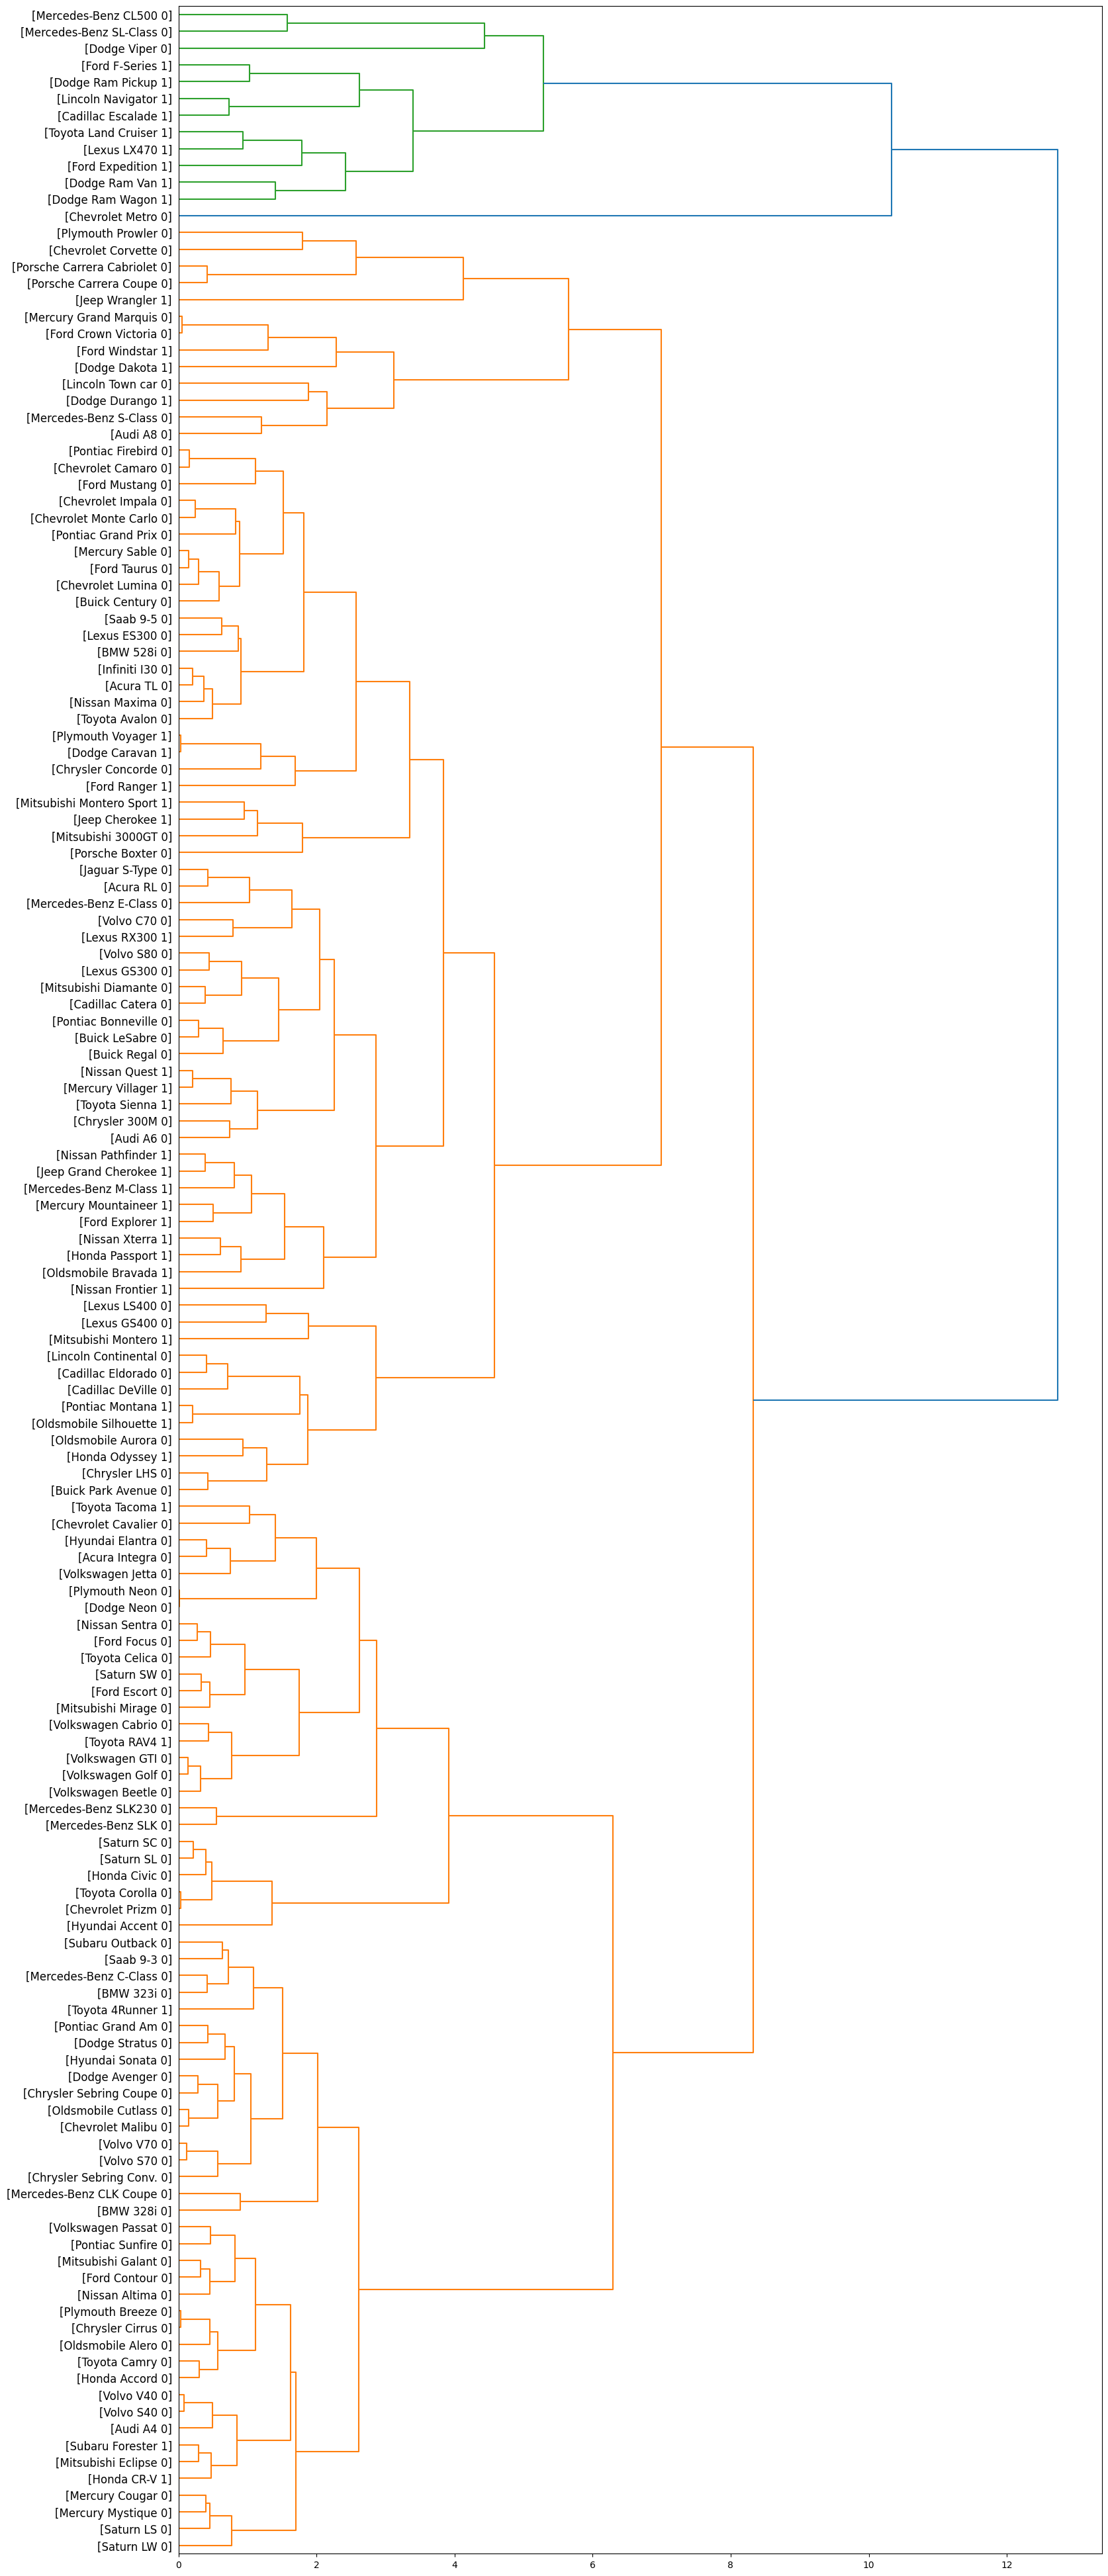

In [121]:
import pylab
fig = pylab.figure(figsize=(18, 50))
def llf(id):
    return '[%s %s %s]' % (data['manufact'] [id], data['model'][id], int(float(data['type'][id])))

dendro = hierarchy.dendrogram(Z_using_dist_matrix,  leaf_label_func=llf, leaf_rotation=0, leaf_font_size =12, orientation = 'right')